In [3]:
# !pip install -U tensorflow_datasets

In [4]:
from __future__ import absolute_import, division, print_function 

# import tensorflow library
import tensorflow as tf
import tensorflow_datasets as tfds

# import helper library
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import progress bar 
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)


2.7.0


In [5]:
dataset, metadata = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD4V0QA/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD4V0QA/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
dataset['train']

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [7]:
# train_dataset_full, test_dataset_full = dataset['train'], dataset['test']

In [8]:
dataset['train']

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [9]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [10]:
# train_dataset_validation, train_dataset = train_dataset_full[:5000], train_dataset_full[5000:]
# test_dataset_validation, test_dataset = test_dataset_full[:5000], test_dataset_full[5000:]

In [11]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
num_trian_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples
print(f'Number of traning examples : {num_trian_example}')
print(f'Number of test examples : {num_test_example}')

Number of traning examples : 60000
Number of test examples : 10000


In [13]:
# Cleaning of dataset 

def normalize(images, labels):
    images = tf.cast(x=images, dtype=tf.float32)
    images /= 255
    return images, labels

# Map function will apply user defined normalize function to train and test dataset
train_dataset = train_dataset.map(normalize)
test_datase = test_dataset.map(normalize)


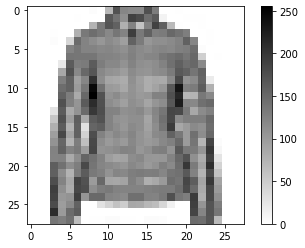

In [14]:
# taking 1 test dataset image and plotting it. 

for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28, 28))

# Plot the image 
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


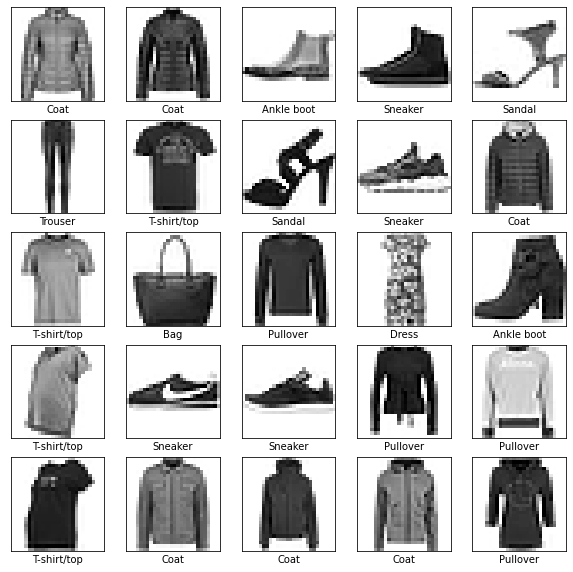

In [15]:
# Plotting dataset for 25 images
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28, 28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
    i+=1
plt.show()
    



In [16]:
# Building Model 
model = tf.keras.models.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
     tf.keras.layers.Dense(units=300, activation="relu"),
     tf.keras.layers.Dense(units=100, activation="relu"),
    #  tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax)     
    ])

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Training Model 
BATCH_SIZE=32
train_dataset = train_dataset.repeat().shuffle(num_trian_example).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
get_weights, get_biases = model.layers[1].get_weights()
get_weights
get_biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
history = model.fit(x=train_dataset,
          epochs=5,
          steps_per_epoch=math.ceil(num_trian_example/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 17s 4ms/step - loss: 0.4721 - accuracy: 0.8302
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3581 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3191 - accuracy: 0.8835
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3029 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2809 - accuracy: 0.8961


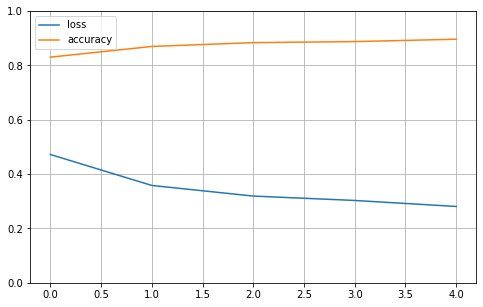

In [22]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [39]:
# tf.keras.backend.clear_session()

In [23]:
# Testing/Predicting the model 
test_loss, test_accuracy = model.evaluate(test_dataset)#, setps=math.ceil(num_test_example/32))

print(f'Accuracy of test dataset: {test_accuracy}')


313/313 [==============================] - 2s 6ms/step - loss: 50.4220 - accuracy: 0.8640
Accuracy of test dataset: 0.8640000224113464


In [ ]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    prediction = model.predict(test_images)